In [1]:
system('conda env list | grep data730', intern = TRUE)

[1] "data730               *  /home/studio-lab-user/.conda/envs/data730"

In [2]:
library('conflicted')
library('dplyr')
library('tidyverse')
library('tidymodels')
library('recipes')
library('workflows')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.2.1     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     



In [3]:
data_url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-11-23/episodes.csv"
dr_who_raw = read_csv(data_url, col_types = cols())
dr_who_raw |> head()

era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>
revived,1,NA,157,1,Rose,episode,2005-03-26,1.1,10.81,76,45
revived,1,NA,158,2,The End of the World,episode,2005-04-02,1.2,7.97,76,44
revived,1,NA,159,3,The Unquiet Dead,episode,2005-04-09,1.3,8.86,80,44
revived,1,NA,160a,4,Aliens of London,episode,2005-04-16,1.4,7.63,82,45
revived,1,NA,160b,5,World War Three,episode,2005-04-23,1.5,7.98,81,42
revived,1,NA,161,6,Dalek,episode,2005-04-30,1.6,8.63,84,45


In [4]:
dr_who_raw |> tail()

era,season_number,serial_title,story_number,episode_number,episode_title,type,first_aired,production_code,uk_viewers,rating,duration
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>
revived,13,Flux,297a,1,The Halloween Apocalypse,episode,2021-10-31,NA,5.79,76,50
revived,13,Flux,297b,2,War of the Sontarans,episode,2021-11-07,NA,NA,77,59
revived,13,Flux,297c,3,"Once, Upon Time",episode,2021-11-14,NA,NA,NA,49
revived,13,Flux,297d,4,Village of the Angels,episode,2021-11-21,NA,NA,NA,NA
revived,13,Flux,297e,5,Survivors of the Flux,episode,2021-11-28,NA,NA,NA,NA
revived,13,Flux,297f,6,NA,episode,2021-12-05,NA,NA,NA,NA


In [5]:
dr_who_raw |> glimpse()

Rows: 172
Columns: 12
$ era             <chr> "revived", "revived", "revived", "revived", "revived",…
$ season_number   <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, …
$ serial_title    <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ story_number    <chr> "157", "158", "159", "160a", "160b", "161", "162", "16…
$ episode_number  <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, NA, 1, 2, 3…
$ episode_title   <chr> "Rose", "The End of the World", "The Unquiet Dead", "A…
$ type            <chr> "episode", "episode", "episode", "episode", "episode",…
$ first_aired     <date> 2005-03-26, 2005-04-02, 2005-04-09, 2005-04-16, 2005-…
$ production_code <chr> "1.1", "1.2", "1.3", "1.4", "1.5", "1.6", "1.7", "1.8"…
$ uk_viewers      <dbl> 10.81, 7.97, 8.86, 7.63, 7.98, 8.63, 8.01, 8.06, 7.11,…
$ rating          <dbl> 76, 76, 80, 82, 81, 84, 81, 83, 84, 85, 82, 86, 89, 84…
$ duration        <dbl> 45, 44, 44, 45, 42, 45, 44, 45, 45, 45, 45, 45, 45, 60…


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 5 rows containing non-finite outside the scale range (`stat_bin()`).”


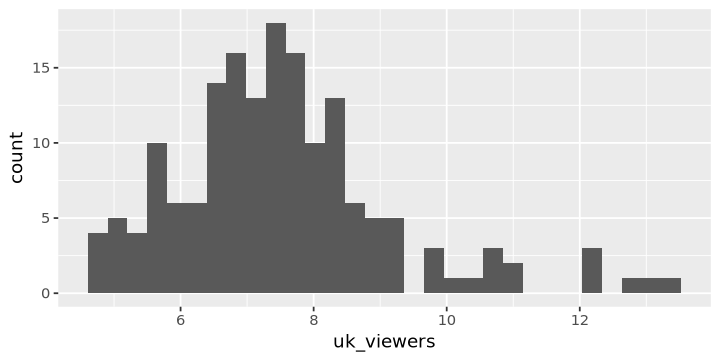

In [6]:
options(repr.plot.height = 3, repr.plot.width = 6)
ggplot(dr_who_raw, aes(x = uk_viewers)) + geom_histogram()

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_line()`).”


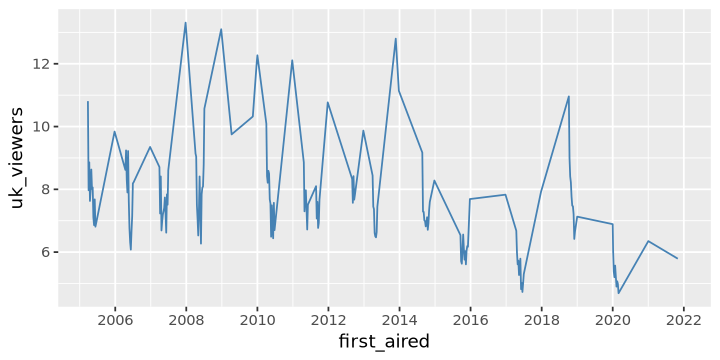

In [7]:

ggplot(dr_who_raw, aes(x = first_aired, y = uk_viewers)) + 
    geom_line(color = 'steelblue') +
    scale_x_date(date_breaks = "2 years", date_labels = "%Y")

In [8]:
dr_who_raw |>
    top_n(rating, n = 3) |>
    select(first_aired, episode_title)

first_aired,episode_title
<date>,<chr>
2005-06-18,The Parting of the Ways
2006-07-08,Doomsday
2008-05-31,Silence in the Library
2008-06-07,Forest of the Dead
2008-06-28,The Stolen Earth
2008-07-05,Journey's End
2010-01-01,The End of Time – Part Two
2010-06-26,The Big Bang
2012-09-01,Asylum of the Daleks


In [9]:
rec = recipe( data = dr_who_raw, uk_viewers ~ first_aired) |>
    step_naomit(uk_viewers) |>
    step_date(first_aired, features = 'year') |>
    step_holiday(first_aired, holidays = c('NewYearsDay', 'ChristmasDay'), keep_original_cols = FALSE) |>
    prep()
    
rec |> bake(new_data = NULL) |> glimpse()
     

Rows: 167
Columns: 4
$ uk_viewers               <dbl> 10.81, 7.97, 8.86, 7.63, 7.98, 8.63, 8.01, 8.…
$ first_aired_year         <int> 2005, 2005, 2005, 2005, 2005, 2005, 2005, 200…
$ first_aired_NewYearsDay  <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ first_aired_ChristmasDay <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, …


In [11]:
mod = linear_reg() |> set_engine('lm')

wf = workflow() |>
    add_recipe(rec) |>
    add_model(mod)

ERROR: [1m[33mError[39m in `add_recipe()`:[22m
[33m![39m Can't add a trained recipe to a workflow.


In [11]:
boots = bootstraps(dr_who_raw, times = 1000)

boots |> glimpse()

Rows: 1,000
Columns: 2
$ splits <list> [<boot_split[172 x 68 x 172 x 12]>], [<boot_split[172 x 64 x 1…
$ id     <chr> "Bootstrap0001", "Bootstrap0002", "Bootstrap0003", "Bootstrap00…


In [13]:
toss_fair_coin_n_times = function(n_tosses = 250) {
    result = ifelse(runif(n = n_tosses) < 0.5, 'heads', 'tails')
    result
}

repeat_the_experiment = function(n_iterations, n_tosses = 250) {
    n_heads_each_iteration = c()
    for (i in 1:n_iterations) {
        n_heads = sum(toss_fair_coin_n_times(n_tosses) == 'heads')
        n_heads_each_iteration = c(n_heads_each_iteration, n_heads)
    }
    n_heads_each_iteration
}

In [14]:
n_iterations = 10000
n_tosses = 250
observed_deviation = 139 - 125 #heads observed, expected value for a fair coin of 125

n_heads_each_experiment = repeat_the_experiment(n_iterations, n_tosses)

x = mean(abs(n_heads_each_experiment - 125) >= observed_deviation)
paste0('With a fair coin we could expect a deviation as large or larger than we observed ', x*100, '% of times')

[1] "With a fair coin we could expect a deviation as large or larger than we observed 8.49% of times"